# Training Loss vs Epoch by Activation


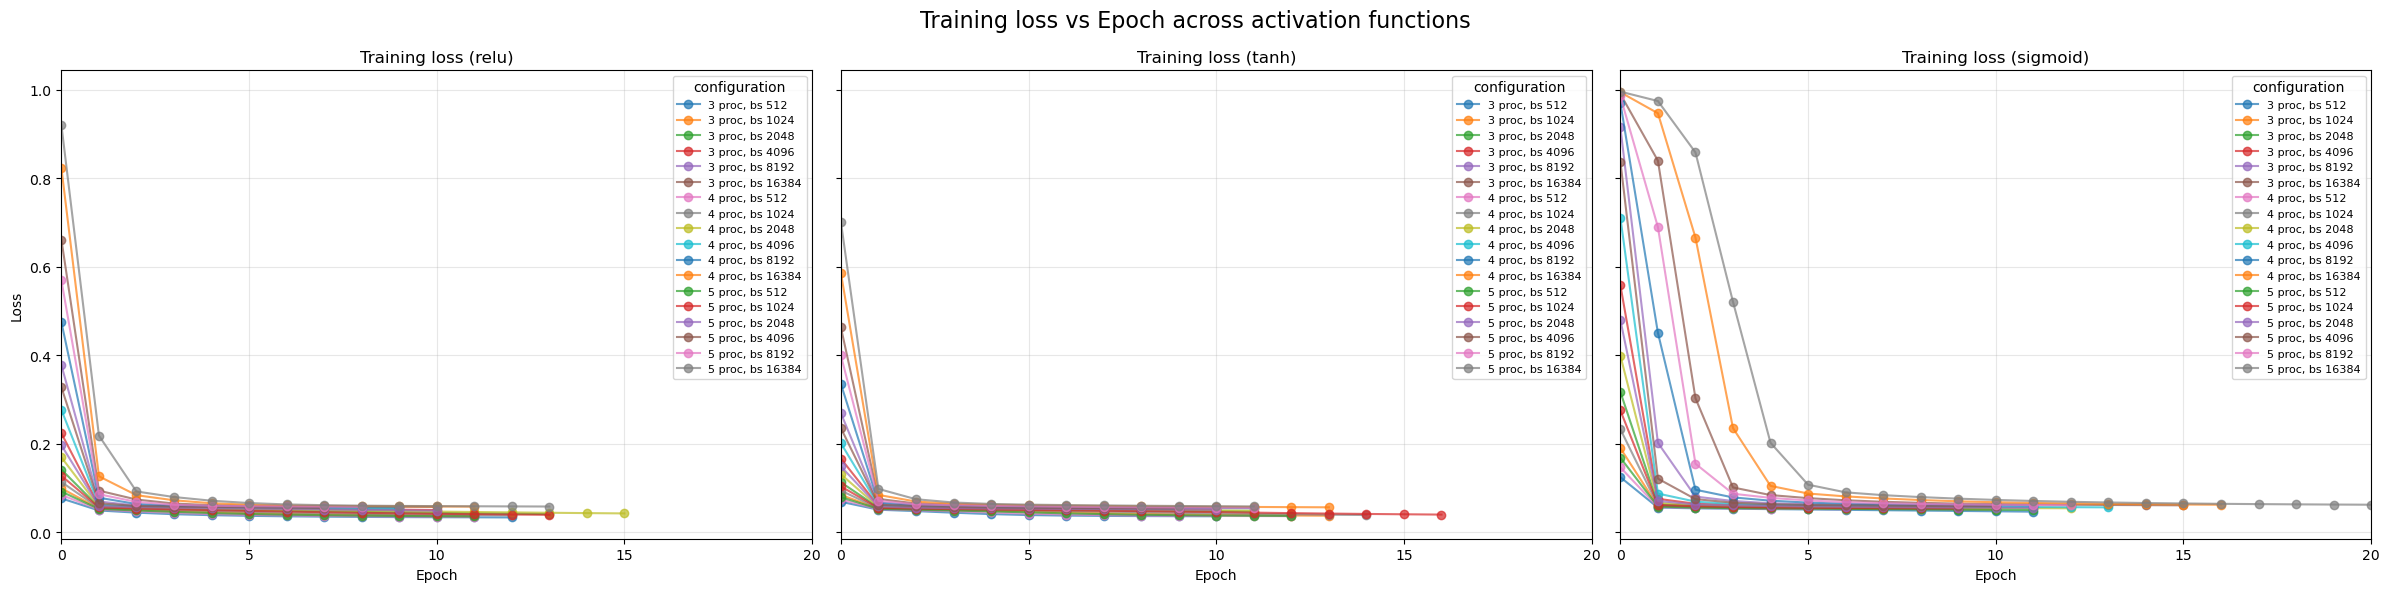

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

loss_df = pd.read_csv('sgd_training_losses.csv')
loss_df = loss_df.sort_values(['activation', 'num_of_process', 'batch_size', 'epoch'])
activations = ['relu', 'tanh', 'sigmoid']
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

for ax, activation in zip(axes, activations):
    subset = loss_df[loss_df['activation'] == activation]
    for (nproc, batch), group in subset.groupby(['num_of_process', 'batch_size']):
        label = f"{nproc} proc, bs {batch}"
        ax.plot(group['epoch'], group['loss'], marker='o', alpha=0.7, label=label)
    ax.set_title(f"Training loss ({activation})")
    ax.set_xlabel('Epoch')
    ax.set_xlim(0, 20)
    ax.set_xticks(range(0, 21, 5))
    ax.grid(True, alpha=0.3)
    if ax is axes[0]:
        ax.set_ylabel('Loss')
    ax.legend(title='configuration', fontsize=8)

fig.suptitle('Training loss vs Epoch across activation functions', fontsize=16)
fig.tight_layout()
plt.show()



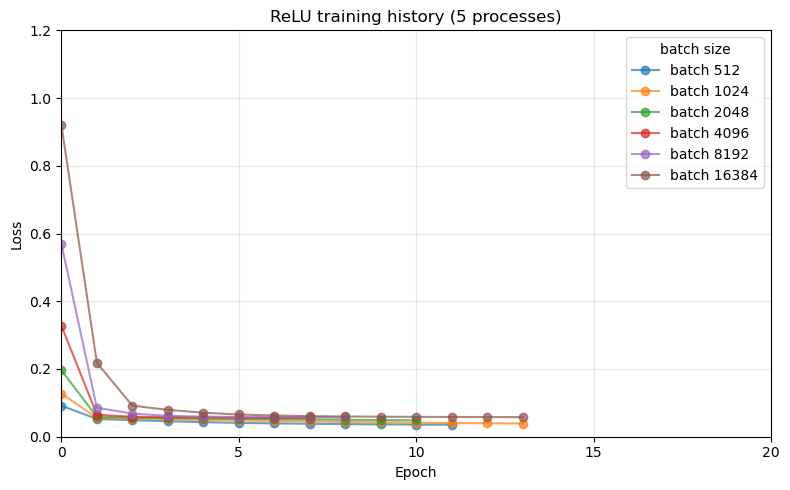

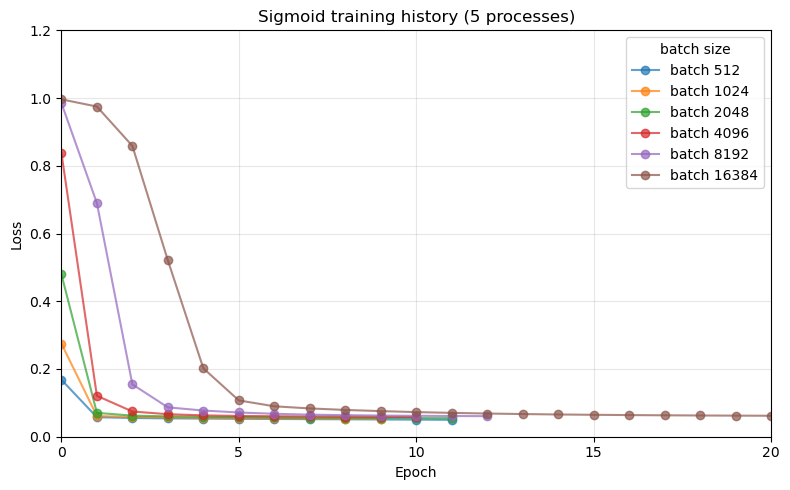

In [46]:

# Additional plots for 5-process runs
five_proc = loss_df[loss_df['num_of_process'] == 5]

fig, ax = plt.subplots(figsize=(8, 5))
relu_subset = five_proc[five_proc['activation'] == 'relu']
for batch, group in relu_subset.groupby('batch_size'):
    ax.plot(group['epoch'], group['loss'], marker='o', alpha=0.7, label=f"batch {batch}")
ax.set_title('ReLU training history (5 processes)')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(0, 20)
ax.set_ylim(0, 1.2)
ax.set_xticks(range(0, 21, 5))
ax.grid(True, alpha=0.3)
ax.legend(title='batch size')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
sigmoid_subset = five_proc[five_proc['activation'] == 'sigmoid']
for batch, group in sigmoid_subset.groupby('batch_size'):
    ax.plot(group['epoch'], group['loss'], marker='o', alpha=0.7, label=f"batch {batch}")
ax.set_title('Sigmoid training history (5 processes)')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(0, 20)
ax.set_ylim(0, 1.2)
ax.set_xticks(range(0, 21, 5))
ax.grid(True, alpha=0.3)
ax.legend(title='batch size')
plt.tight_layout()
plt.show()

# RMSE Plots

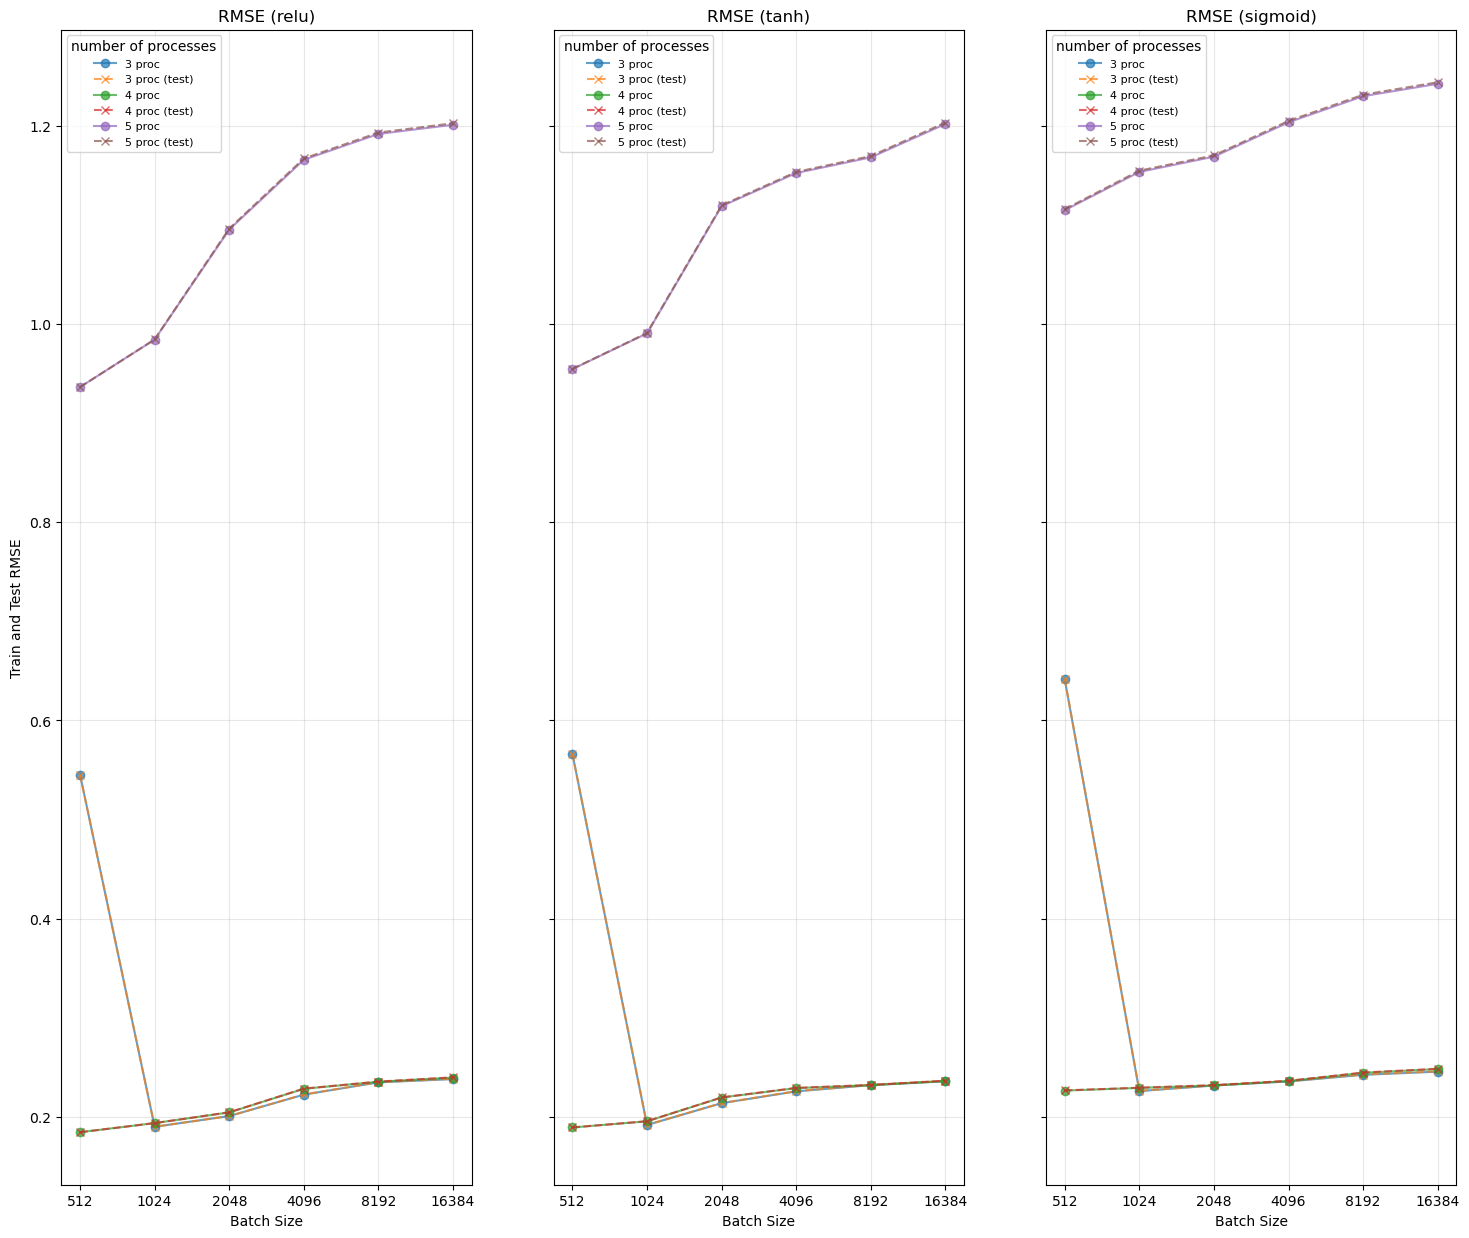

In [48]:
# import data from sgd_training_results.csv
from matplotlib.ticker import ScalarFormatter

results_df = pd.read_csv('sgd_training_results.csv')
results_df = results_df.sort_values(['activation', 'num_of_process', 'batch_size'])
activations = ['relu', 'tanh', 'sigmoid']
rmses = ['train_rmse', 'test_rmse']
fig, axes = plt.subplots(1, 3, figsize=(18, 15), sharey=True) 
for ax, activation in zip(axes, activations):
    subset = results_df[results_df['activation'] == activation]
    for nproc, group in subset.groupby('num_of_process'):
        ax.plot(group['batch_size'], group['train_rmse'], marker='o', alpha=0.7, label=f"{nproc} proc")
        ax.plot(group['batch_size'], group['test_rmse'], marker='x', alpha=0.7, linestyle='--', label=f"{nproc} proc (test)")
    ax.set_title(f"RMSE ({activation})")
    ax.set_xlabel('Batch Size')
    ax.set_xscale('log', base=2)
    ax.set_xticks([512, 1024, 2048, 4096, 8192, 16384])
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.grid(True, alpha=0.3)
    if ax is axes[0]:
        ax.set_ylabel('Train and Test RMSE')
    ax.legend(title='number of processes', fontsize=8)
                                                

# Training Time

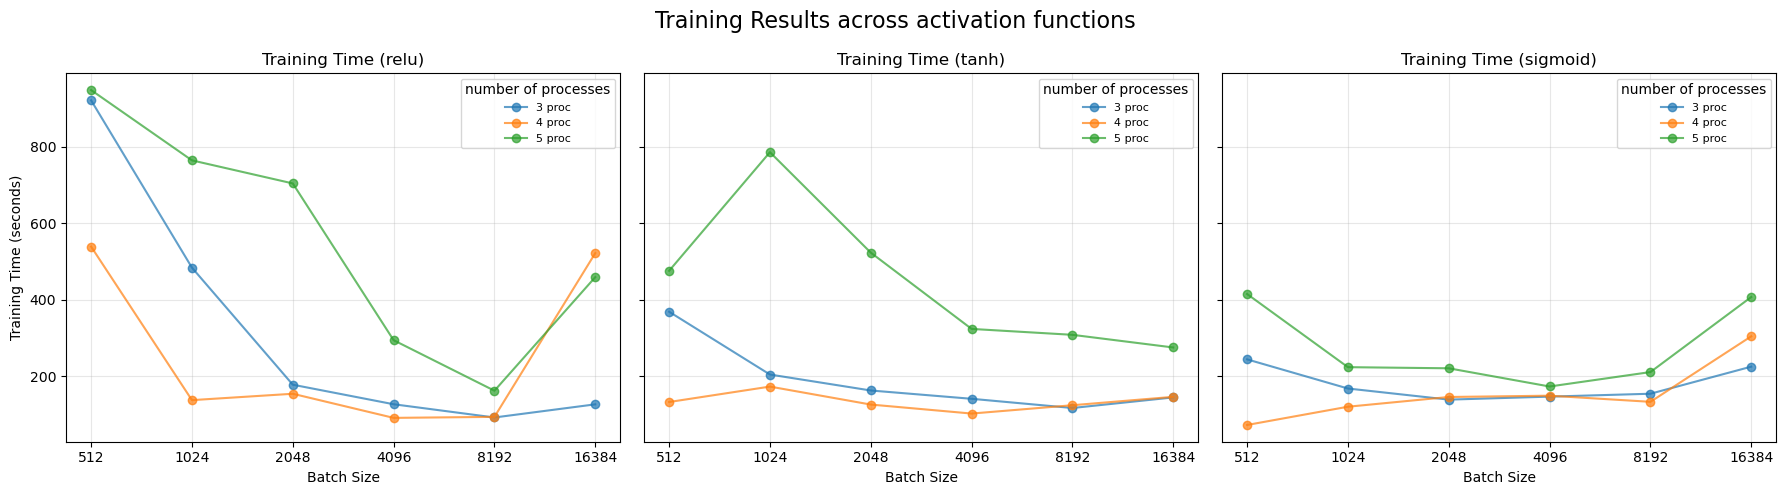

In [49]:
# Training time plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, activation in zip(axes, activations):                       
    subset = results_df[results_df['activation'] == activation]
    for nproc, group in subset.groupby('num_of_process'):
        ax.plot(group['batch_size'], group['training_time_sec'], marker='o', alpha=0.7, label=f"{nproc} proc")
    ax.set_title(f"Training Time ({activation})")
    ax.set_xlabel('Batch Size')
    ax.set_xscale('log', base=2)
    ax.set_xticks([512, 1024, 2048, 4096, 8192, 16384])
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.grid(True, alpha=0.3)
    if ax is axes[0]:
        ax.set_ylabel('Training Time (seconds)')
    ax.legend(title='number of processes', fontsize=8)  
    
fig.suptitle('Training Results across activation functions', fontsize=16)
fig.tight_layout()
plt.show()


# Best Performer

Best performer configuration:
num_of_process            4
activation             relu
batch_size              512
train_rmse           0.1846
test_rmse            0.1846
training_time_sec     538.9
Name: 18, dtype: object


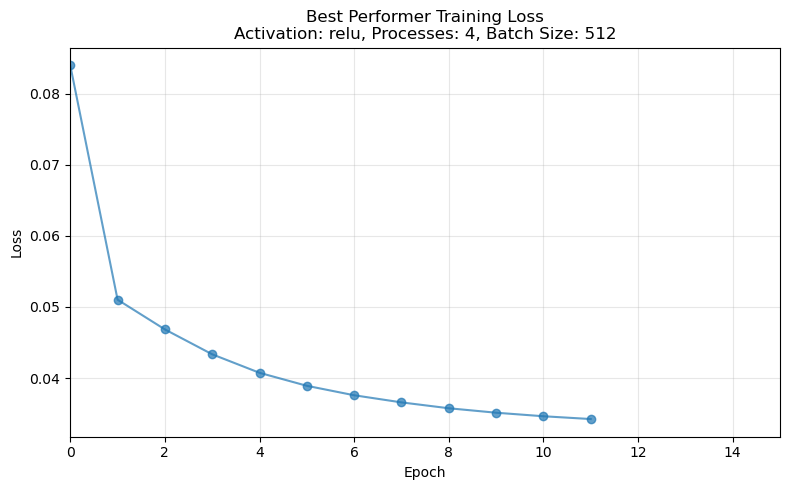

In [55]:
# find the best performer based on lowest test RMSE
best_row = results_df.loc[results_df['test_rmse'].idxmin()]
print("Best performer configuration:")
print(best_row)

# plot the best performer training loss curve
best_activation = best_row['activation']
best_nproc = best_row['num_of_process']
best_batch = best_row['batch_size']
best_subset = loss_df[(loss_df['activation'] == best_activation) &
                      (loss_df['num_of_process'] == best_nproc) &
                      (loss_df['batch_size'] == best_batch)]
plt.figure(figsize=(8, 5))
plt.plot(best_subset['epoch'], best_subset['loss'], marker='o', alpha=0.7)
plt.title(f"Best Performer Training Loss\nActivation: {best_activation}, Processes: {best_nproc}, Batch Size: {best_batch}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 15)
plt.xticks(range(0, 16, 2))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()  

Top 3 performer configurations:
    num_of_process activation  batch_size  train_rmse  test_rmse  \
18               4       relu         512      0.1846     0.1846   
24               4       tanh         512      0.1894     0.1894   
1                3       relu        1024      0.1901     0.1901   

    training_time_sec  
18             538.90  
24             132.45  
1              483.87  


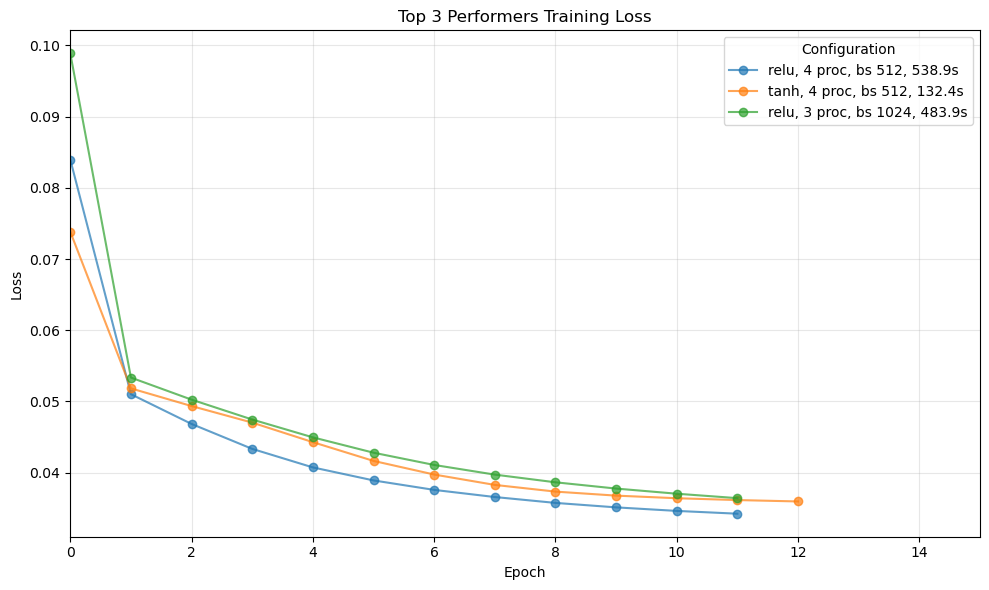

In [59]:
# find the best three performers based on lowest test RMSE
top3_rows = results_df.nsmallest(3, 'test_rmse')
print("Top 3 performer configurations:")
print(top3_rows)

# plot training loss curves for the top 3 performers
plt.figure(figsize=(10, 6))
for idx, row in top3_rows.iterrows():
    activation = row['activation']
    nproc = row['num_of_process']
    batch = row['batch_size']
    time_sec = row['training_time_sec']
    subset = loss_df[(loss_df['activation'] == activation) &
                     (loss_df['num_of_process'] == nproc) &
                     (loss_df['batch_size'] == batch)]
    plt.plot(subset['epoch'], subset['loss'], marker='o', alpha=0.7, label=f"{activation}, {nproc} proc, bs {batch}, {time_sec:.1f}s")
plt.title("Top 3 Performers Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 15)
plt.xticks(range(0, 16, 2))
plt.grid(True, alpha=0.3)
plt.legend(title='Configuration', fontsize=10)
plt.tight_layout()
plt.show()
